# Este es un ejemplo del uso de Word2vec-Gensim  sobre un dataset de Google News  que tiene 1 billón de palabras  y que fue entrenado con el modelo skip-gram con representaciones vectoriales de 300.

In [8]:
# reveal.js presentation configuration
from notebook.services.config import ConfigManager


cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'league',
              'transition': 'fade',
              'center': 'false',
              'overview' : 'true',
              'start_slideshow_at': 'selected'
})

# import utility libraries
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 12.0)
#pd.core.format.set_option('notebook_repr_html',True)
pd.set_option('display.max_rows', 10)

# pretty print function
def pp(obj):
    print(pd.DataFrame(obj))
    
%matplotlib inline


# Google News Dataset

* Internal Google data set with one billion words
* 692k vocabulary. Words with frequency below 5 were discarded.
* 300-dimensions representation was obtained by training a skip-gram model.
* Model available at https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

# Cargando el modelo con Gensim,  aquí se carga el preentrenado de Google news para realizar todo tipo de consultas.

In [9]:
import gensim
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
# import wrod2vec model from gensim
from gensim.models.word2vec import Word2Vec

# load Google News pre-trained network
model = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

# Las palabras relacionadas semánticamente tienen representaciones similares 

Este es el vector de la palabra computer de dimensión 300 [ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.66406250e-02 -1.77734375e-01 -2.08984375e-01  1.76757812e-01
  2.38037109e-02 -2.57812500e-01

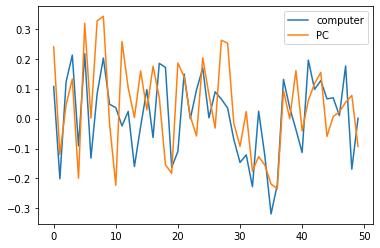

In [10]:
from matplotlib import pyplot as plt
plt.plot(model['computer'][:50], label = 'computer')
plt.plot(model['PC'][:50], label = 'PC')
plt.legend()
print('Este es el vector de la palabra computer de dimensión 300',model['computer'])
print(len(model['computer']))

# La similaridad semántica = representación vectorial de la similaridad

In [11]:
pp(model.most_similar(positive=['Mexico']))

                      0         1
0                Mexcio  0.705328
1                México  0.696470
2               Mexican  0.676909
3      PORTALES_Eastern  0.661456
4              Mexicans  0.652560
5             Guatemala  0.642283
6  Monterrey_Nuevo_León  0.624553
7               Mexicos  0.616529
8             Jaime_Zea  0.616252
9             Monterrey  0.614505


# Resolviendo analogías

* **man** es a  **woman** como  **king** es a  **??**
* Las relaciones son codificadas como diferencia de vectores de palabras: 
$$ f(\textrm{"woman"}) - f(\textrm{"man"}) = f(\textrm{"??"}) - f(\textrm{"king"})$$
* Podemos al vector de **king** la relación del vector codificada: $$ f(\textrm{"king"}) + (f(\textrm{"woman"}) - f(\textrm{"man"})) = f(\textrm{"??"}) $$

In [12]:
result = model.most_similar(negative=['man'], 
                            positive=['woman', 'king'])
pp(result)


               0         1
0          queen  0.711819
1        monarch  0.618967
2       princess  0.590243
3   crown_prince  0.549946
4         prince  0.537732
5          kings  0.523684
6  Queen_Consort  0.523595
7         queens  0.518113
8         sultan  0.509859
9       monarchy  0.508741


In [6]:
result = model.most_similar(negative=['France'], 
                            positive=['Italy', 'Paris'])
pp(result)


                0         1
0           Milan  0.722214
1            Rome  0.702831
2  Palermo_Sicily  0.596757
3         Italian  0.591127
4         Tuscany  0.563281
5         Bologna  0.560836
6          Sicily  0.559638
7   Bologna_Italy  0.547006
8     Berna_Milan  0.546403
9           Genoa  0.530890


# Con la vectorización del curpus se pueden realizar consulatas de analogías

In [13]:
def plot_data(orig_data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(orig_data)
    plt.figure(figsize=(7, 5), dpi=100)
    plt.plot(data[:,0], data[:,1], '.')
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(len(data)/2):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+len(data)/2],
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3")
                )

In [14]:
def analogy(worda, wordb, wordc):
    result = model.most_similar(negative=[worda], 
                                positive=[wordb, wordc])
    return result[0][0]
countries = ['Mexico', 'Colombia', 'Brazil', 'Venezuela', 'France', 'Spain', 'Egypt', 'China']
presidents = [analogy('USA', 'President_Barack_Obama', country) for country in countries]
pp(zip(countries,presidents))

           0                          1
0     Mexico  President_Felipe_Calderon
1   Colombia     President_Alvaro_Uribe
2     Brazil      President_Luiz_Inacio
3  Venezuela      President_Hugo_Chavez
4     France  President_Nicolas_Sarkozy
5      Spain                   Zapatero
6      Egypt    President_Hosni_Mubarak
7      China         Premier_Wen_Jiabao


TypeError: 'float' object cannot be interpreted as an integer

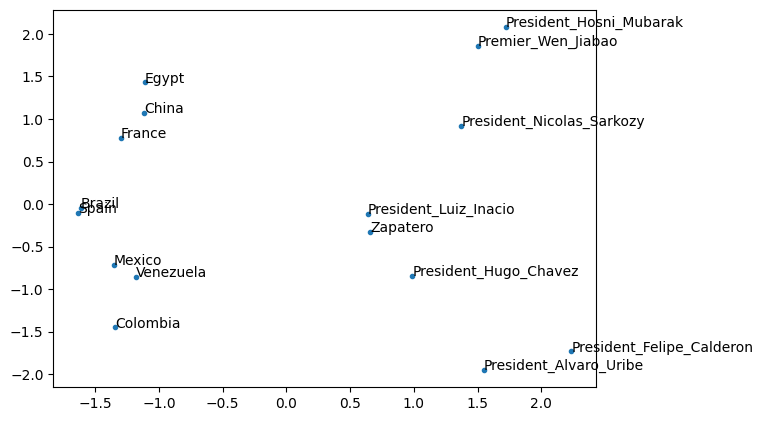

In [15]:
labels = countries + presidents
data = [model[w] for w in labels]
plot_data(data, labels)

In [16]:
pp(model.most_similar(positive=['Mexican', 'river']))

                          0         1
0                Rio_Grande  0.680104
1                     creek  0.599652
2               Rio_Conchos  0.582544
3                      lake  0.577315
4                 Río_Bravo  0.577050
5            Nogales_Sonora  0.572667
6                Los_Ebanos  0.571761
7         Mississippi_River  0.571416
8                Río_Grande  0.569076
9  Elephant_Butte_Reservoir  0.568977


## Visualizing embeddings with t-sne

Visualizaremos las 2000 palabras más frecuentes en inglés  (http://www.rupert.id.au/resources/4000-most-common-english-words-csv.csv).

In [10]:

target_words = [line.strip().lower() for line in open("4000-most-common-english-words-csv.csv")][:2000]
words = [word for word in target_words if word in model] 
target_matrix = np.array([model[word] for word in words])

* t-Distributed Stochastic Neighbor Embedding (t-SNE) dimensionality reduction tecnique Well suited for the visualization of high-dimensional datasets (http://lvdmaaten.github.io/tsne/code/tsne_python.zip)

In [11]:

from tsne import tsne
reduced_matrix = tsne(target_matrix, 2);

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1993...
Computing P-values for point 500 of 1993...
Computing P-values for point 1000 of 1993...
Computing P-values for point 1500 of 1993...
Mean value of sigma: 0.570938
Iteration 10: error is 20.854493
Iteration 20: error is 20.101254
Iteration 30: error is 19.491281
Iteration 40: error is 19.579847
Iteration 50: error is 19.559450
Iteration 60: error is 19.533512
Iteration 70: error is 19.542143
Iteration 80: error is 19.552015
Iteration 90: error is 19.545636
Iteration 100: error is 19.547705
Iteration 110: error is 2.899609
Iteration 120: error is 2.414016
Iteration 130: error is 2.190822
Iteration 140: error is 2.049397
Iteration 150: error is 1.953752
Iteration 160: error is 1.883049
Iteration 170: error is 1.827402
Iteration 180: error is 1.782937
Iteration 190: error is 1.746824
Iteration 200: error is 1.717864
Iteration 210: error is 1.694026
Iteration 220: error is 1.673769

In [13]:
max_x = np.amax(reduced_matrix, axis=0)[0]
max_y = np.amax(reduced_matrix, axis=0)[1]

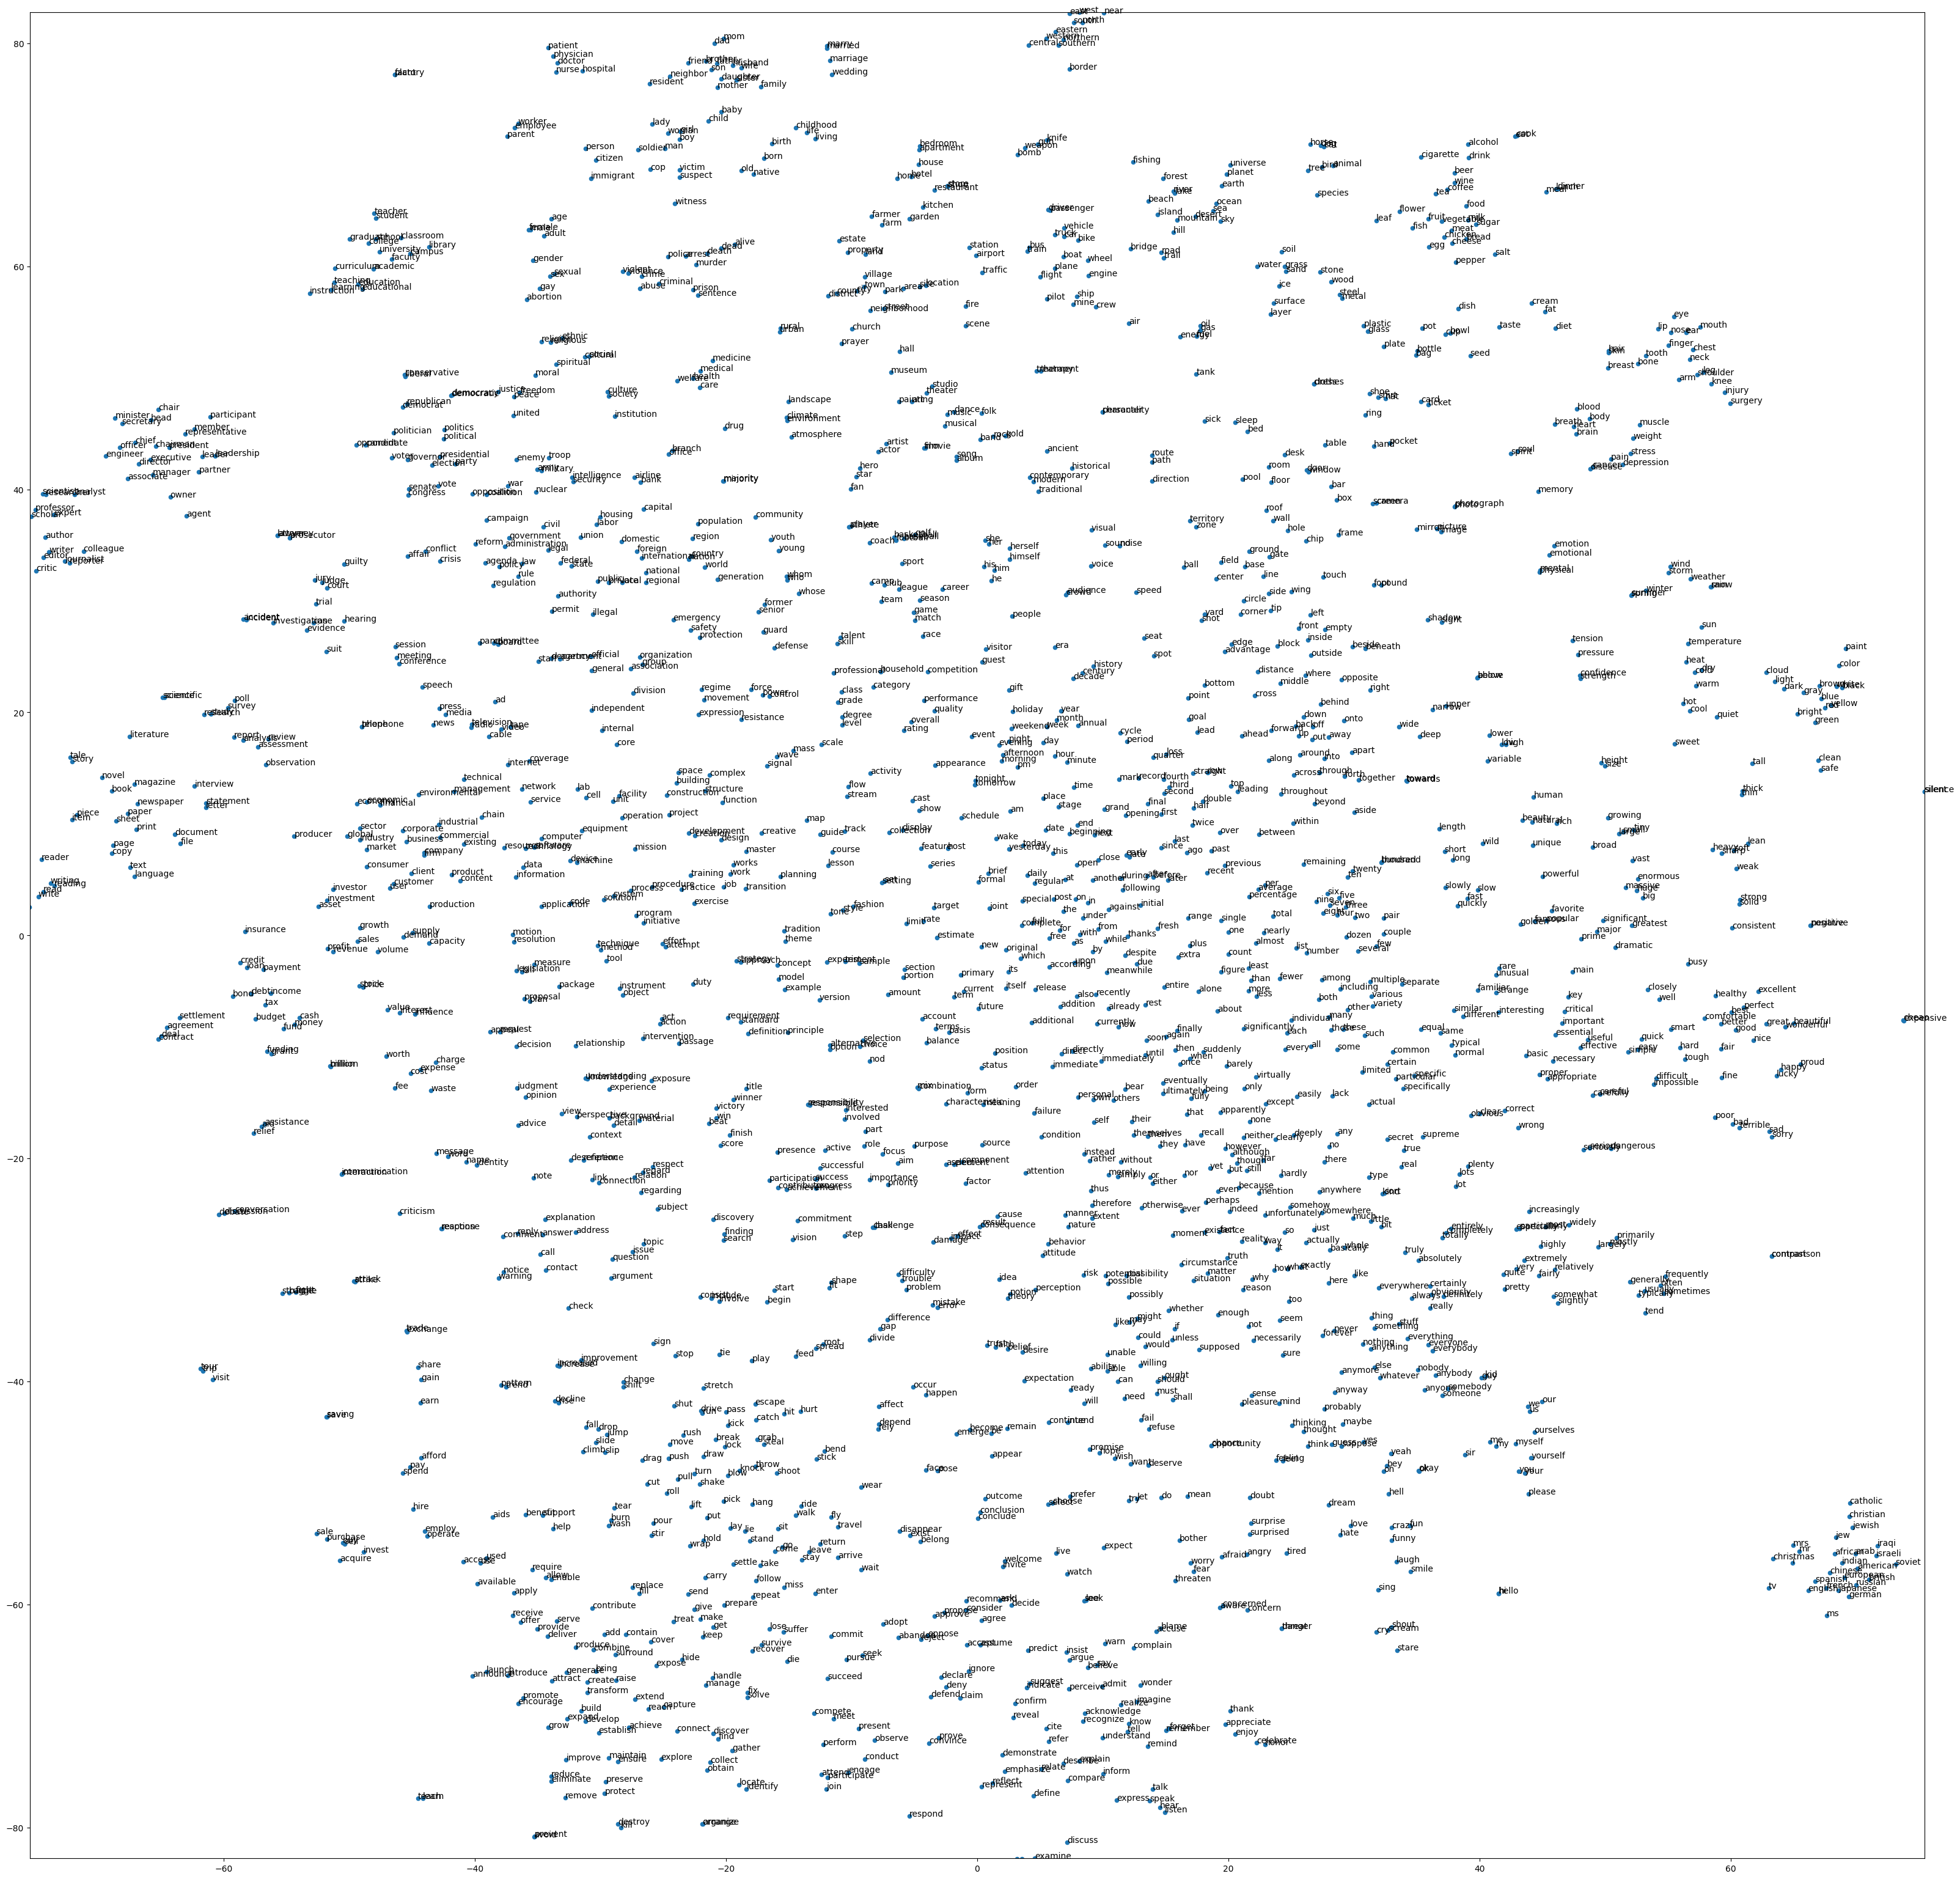

In [14]:
plt.figure(figsize=(40, 40), dpi=100); plt.xlim((-max_x,max_x)); plt.ylim((-max_y,max_y))
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], 20);
for idx, word in enumerate(words[:]):
    x = reduced_matrix[idx, 0]
    y = reduced_matrix[idx, 1]
    plt.annotate(word, (x,y))